In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,stats
from math import sqrt
from numpy import mean,var

In [8]:
data=pd.read_csv('/content/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


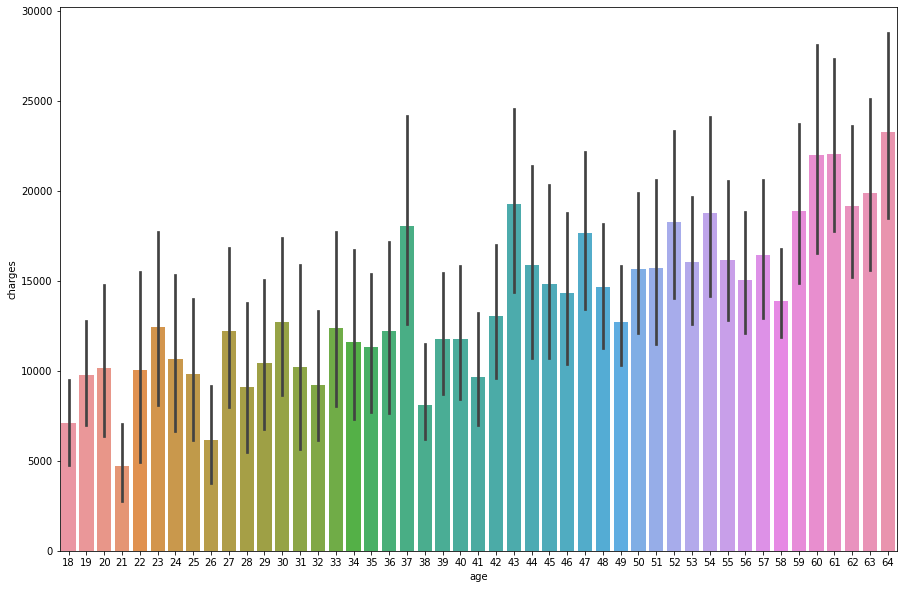

In [14]:
plt.figure(figsize=(15,10))

sns.barplot(x=data['age'],y=data['charges'])


In [15]:
data['children'].unique()

array([0, 1, 3, 2, 5, 4])

## a. Shape of data (2marks)

In [18]:
data.shape

(1338, 7)

## b. Datatype of each attrubute (2 marks)

In [23]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## c. Cheking the presence of missing values(3 marks)

In [29]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [34]:
null=data.isnull()

In [32]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [35]:
for i in null:
  if i==True:
    print("There is null values")
  else:
    print("There is no null values")

There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values
There is no null values


## d. 5 point Summary of numerical attributes(3 marks)

In [36]:
from numpy import percentile

In [38]:
new_data=data.loc[:,['age','bmi','children','charges']]

In [39]:
new_data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [40]:
quartiles=percentile(new_data,[25,50,75])

In [41]:
quartiles

array([ 13.22    ,  32.47    , 328.468475])

In [44]:
data_min,data_max=new_data.min(),new_data.max()

In [43]:
data_min

age           18.0000
bmi           15.9600
children       0.0000
charges     1121.8739
dtype: float64

In [45]:
data_max

age            64.00000
bmi            53.13000
children        5.00000
charges     63770.42801
dtype: float64

In [46]:
#Print 5 number number summary

In [50]:
print('min:\n',data_min)

min:
 age           18.0000
bmi           15.9600
children       0.0000
charges     1121.8739
dtype: float64


In [52]:
print('Q1:\n',quartiles)

Q1:
 [ 13.22      32.47     328.468475]


In [53]:
print('Medians:\n',quartiles)

Medians:
 [ 13.22      32.47     328.468475]


In [54]:
print('Q3:\n',quartiles)

Q3:
 [ 13.22      32.47     328.468475]


In [56]:
print('Max:\n',data_max)

Max:
 age            64.00000
bmi            53.13000
children        5.00000
charges     63770.42801
dtype: float64


In [57]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## e. distribution of bmi,age and charges

In [59]:
dist_data=data.loc[:,['bmi','age','charges']]

In [61]:
dist_data.head()

,bmi,age,charges
0,27.900,19,16884.92400
1,33.770,18,1725.55230
2,33.000,28,4449.46200
3,22.705,33,21984.47061
4,28.880,32,3866.85520


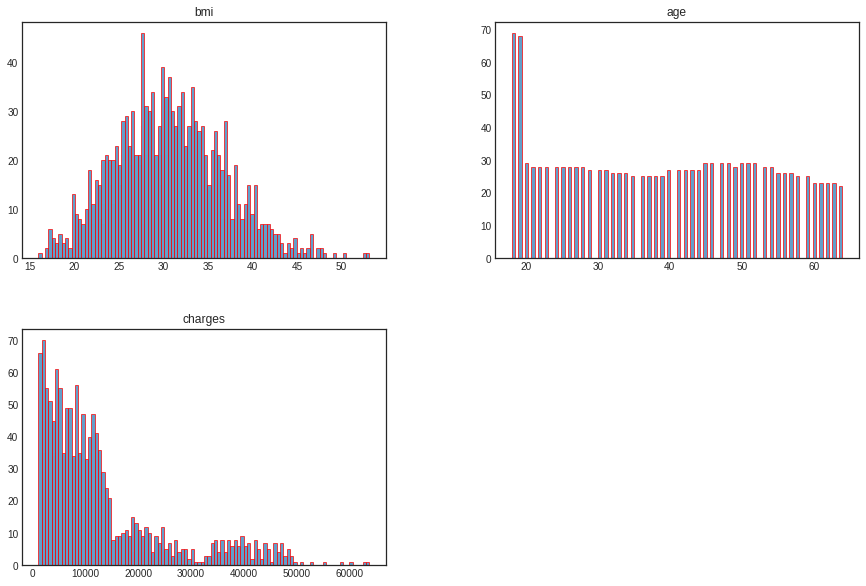

In [83]:
plt.style.use('seaborn-white')
dist_data.hist(bins=100,figsize=(15,10),grid=False,edgecolor = 'red', alpha = 0.7)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


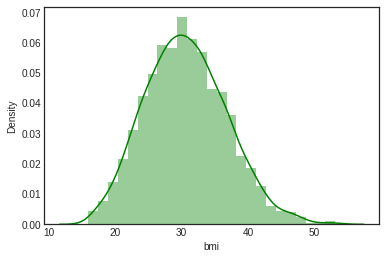

In [79]:
sns.distplot(dist_data['bmi'],color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


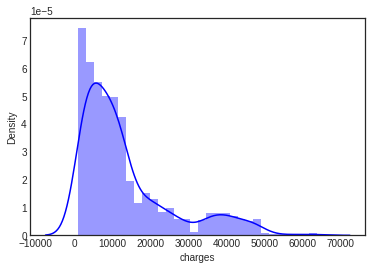

In [76]:
sns.distplot(dist_data['charges'],color='blue')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


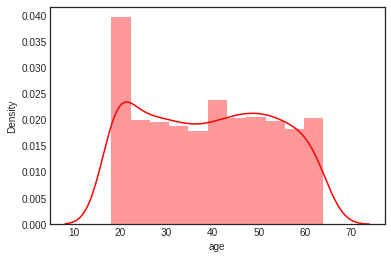

In [77]:
sns.distplot(dist_data['age'],color='red')

## Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [84]:
skeness=pd.DataFrame({'Skewness':[stats.skew(data.bmi),stats.skew(data.age),stats.skew(data.charges)]},
                     index=['bmi','age','charges']
                     )

In [85]:
skeness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


## Cheking the outliers

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

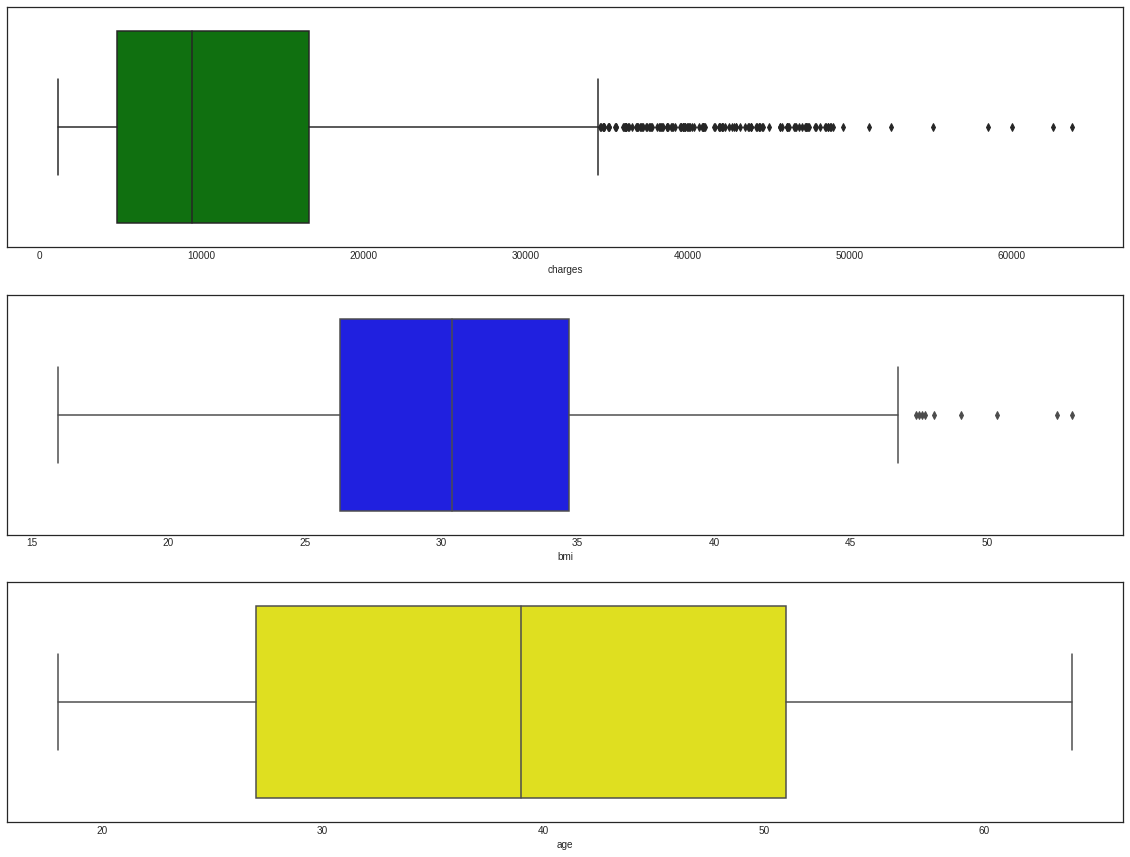

In [95]:
plt.figure(figsize=(20,15))
plt.subplot(311)
sns.boxplot(x=data['charges'],color='green')
plt.subplot(312)
sns.boxplot(x=data.bmi,color='blue')
plt.subplot(313)
sns.boxplot(x=data.age,color='yellow')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


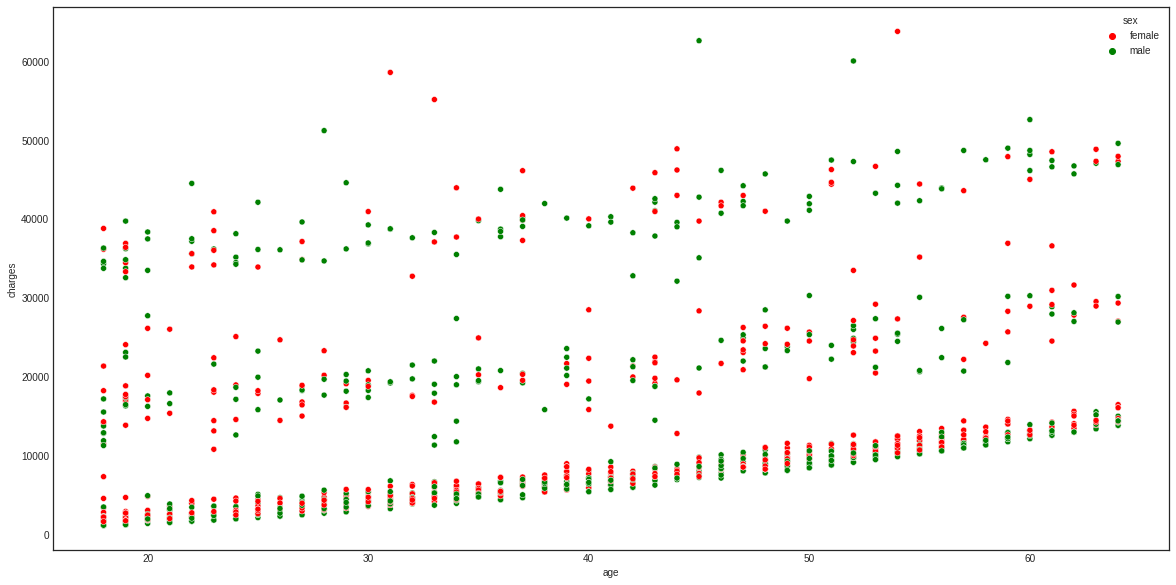

In [98]:
plt.figure(figsize=(20,10))
sns.scatterplot(data.age,data.charges,hue=data.sex,palette= ['red','green'])
